# Function defs

Esta tabla contiene la información de las definiciones de funciones.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'functiondef__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('functiondefs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-22 14:09:26.191714 Data cache files found ...
2024-05-22 14:09:26.235015 Data cache files successfully loaded!!
The dataset contains 59873 (40.56%) instances for BEGINNER class and 87754 (59.44%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'functiondefs'
TABLE_FEATURES = ['functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (59873, 12)
As we can see the downloaded data contains a total of 59873 instances. For each instance we have 12 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 59873 entries, 0 to 59911
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   functiondef__name_convention             59873 non-null  object 
 1   functiondef__number_of_characters        59873 non-null  int64  
 2   functiondef__is_magic                    59873 non-null  bool   
 3   functiondef__is_private                  59873 non-null  bool   
 4   functiondef__body_count                  59873 non-null  int64  
 5   functiondef__expressions_pct             59873 non-null  float64
 6   functiondef__is_async                    59873 non-null  bool   
 7   functiondef__number_of_decorators        59873 non-null  int64  
 8   functiondef__has_return_type_annotation  59873 non-null  bool   
 9   functiondef__has_doc_string              59873 non-null  bool   
 10  functiondef__height                      59873 non-

Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 5 variables boleanas y dos de tipo objeto. 

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [89.78%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
dtype: int64

In [6]:
print_empty_cols(X)

functiondef__name_convention
----------------------------
0 instancias no tienen un valor para la columna functiondef__name_convention


functiondef__number_of_characters
---------------------------------
0 instancias no tienen un valor para la columna functiondef__number_of_characters


functiondef__is_magic
---------------------
0 instancias no tienen un valor para la columna functiondef__is_magic


functiondef__is_private
-----------------------
0 instancias no tienen un valor para la columna functiondef__is_private


functiondef__body_count
-----------------------
0 instancias no tienen un valor para la columna functiondef__body_count


functiondef__expressions_pct
----------------------------
0 instancias no tienen un valor para la columna functiondef__expressions_pct


functiondef__is_async
---------------------
0 instancias no tienen un valor para la columna functiondef__is_async


functiondef__number_of_decorators
---------------------------------
0 instancias no tienen un valo

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
functiondef__name_convention,59873,7,SnakeCase,38458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,59873.0,NaN,NaN,NaN,11.995273,5.9859,1.0,8.0,11.0,15.0,50.0
functiondef__is_magic,59873,2,False,50318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__is_private,59873,2,False,51157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__body_count,59873.0,NaN,NaN,NaN,3.739415,4.011763,1.0,1.0,3.0,5.0,150.0
functiondef__expressions_pct,59873.0,NaN,NaN,NaN,0.218197,0.26621,0.0,0.0,0.142857,0.333333,1.0
functiondef__is_async,59873,2,False,59801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_decorators,59873.0,NaN,NaN,NaN,0.094968,0.29674,0.0,0.0,0.0,0.0,2.0
functiondef__has_return_type_annotation,59873,2,False,48961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__has_doc_string,59873,2,False,36652,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 46
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 12), (12, 18), (18, inf)], # min: 1 ; max: 87
    "functiondef__body_count": [(1.0, 1.0), (1.0, 3.0), (3.0, 5.0), (5.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(1.0, 1.0), (1.0, 1.9), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 10
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(X_copy, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
functiondef__expressions_pct  count  percentage
                   [0.0_0.0]  27358   45.693384
                   [0.0_0.5)  19527   32.614033
                   [0.5_1.0)  10279   17.168006
                   [1.0_inf]   2709    4.524577

functiondef__number_of_decorators  count  percentage
                        [0.0_0.0]  54250   90.608455
                        [0.0_inf]   5623    9.391545

functiondef__type_annotations_pct  count  percentage
                        [0.0_0.0]  48889   81.654502
                        [0.0_1.0)   7132   11.911880
                        [1.0_inf]   3852    6.433618

functiondef__number_of_characters  count  percentage
                         [8.0_12)  19088   31.880814
                          [12_18)  17574   29.352129
                        [1.0_8.0)  13098   21.876305
                         [18_inf]  10113   16.890752

functiondef__body_count  count  percentage
              [3.0_5.0)  16675   27.850617
           

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (59873, 18)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

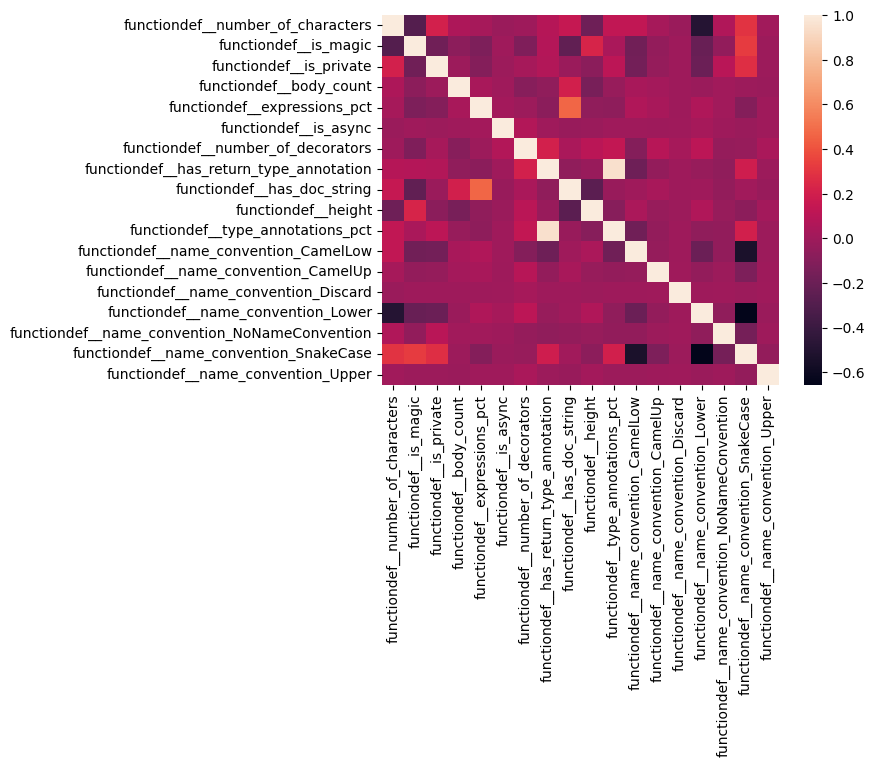

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 12 variables (2 porcentuales, 4 numericas, 5 booleanas y 1 categorica)

### Variable is_private (1/12)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

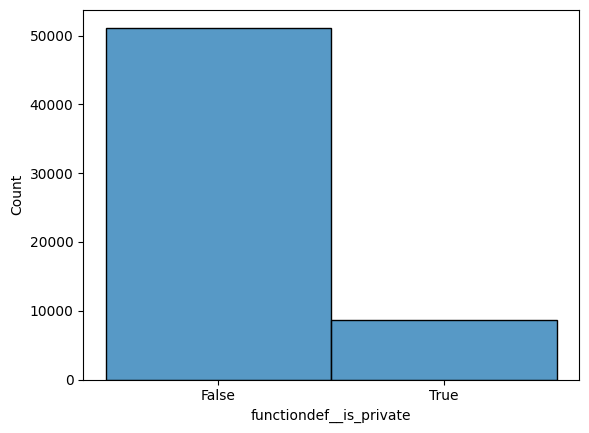

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [12]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 8716 valores verdaderos y 51157 valores falsos. Y, la desviación típica es de 0.35268235206604004
La frecuencia con la que programa puede tener la variable is_private a True es 0.14557479999331918.
La frecuencia con la que programa puede tener la variable is_private a False es 0.8544252000066808.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 85.44% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 14.56% de los items.


In [14]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,8716.000000,8716.0,8716.0,8716.000000,8716.000000,8716.0,8716.000000,8716.000000,8716.000000,8716.000000,8716.000000,8716.0,8716.0,8716.0,8716.0,8716.000000,8716.000000,8716.0
mean,14.991625,0.0,1.0,3.612207,0.152936,0.0,0.111634,0.251950,0.366567,1.615764,0.220483,0.0,0.0,0.0,0.0,0.042680,0.957320,0.0
std,6.357547,0.0,0.0,3.221793,0.216907,0.0,0.317112,0.434158,0.481895,0.594698,0.388995,0.0,0.0,0.0,0.0,0.202147,0.202147,0.0
min,3.000000,0.0,1.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,11.000000,0.0,1.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
50%,14.000000,0.0,1.0,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
75%,19.000000,0.0,1.0,5.000000,0.250000,0.0,0.000000,1.000000,1.000000,2.000000,0.500000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
max,43.000000,0.0,1.0,57.000000,1.000000,0.0,2.000000,1.000000,1.000000,7.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0


### Variable is_magic (2/12)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

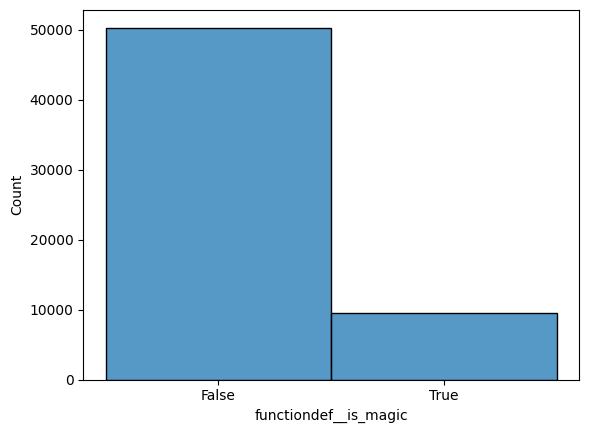

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 9555 valores verdaderos y 50318 valores falsos. Y, la desviación típica es de 0.3662264049053192
La frecuencia con la que programa puede tener la variable is_magic a True es 0.15958779416431446.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.8404122058356855.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 84.04% de los items.
La variable functiondef__is_magic toma el valor de 1.0 en un 15.96% de los items.


In [18]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,9555.000000,9555.0,9555.0,9555.000000,9555.000000,9555.000000,9555.000000,9555.000000,9555.00000,9555.000000,9555.000000,9555.0,9555.0,9555.0,9555.0,9555.0,9555.0,9555.0
mean,8.020722,1.0,0.0,3.091052,0.139411,0.001256,0.013187,0.250026,0.12224,2.082679,0.164238,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,1.318374,0.0,0.0,3.500124,0.241699,0.035418,0.114080,0.433050,0.32758,0.371798,0.287175,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,6.000000,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,8.000000,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,8.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,8.000000,1.0,0.0,4.000000,0.250000,0.000000,0.000000,0.500000,0.00000,2.000000,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,16.000000,1.0,0.0,35.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable is_async (3/12)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

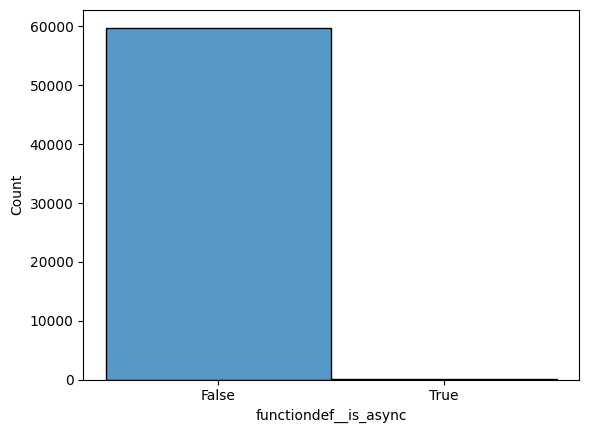

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 72 valores verdaderos y 59801 valores falsos. Y, la desviación típica es de 0.03465716913342476
La frecuencia con la que programa puede tener la variable is_async a True es 0.0012025453877373775.
La frecuencia con la que programa puede tener la variable is_async a False es 0.9987974546122627.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 99.88% de los items.
La variable functiondef__is_async toma el valor de 1.0 en un 0.1203% de los items.


In [22]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,72.000000,72.000000,72.0,72.000000,72.000000,72.0,72.000000,72.000000,72.0,72.000000,72.000000,72.00000,72.0,72.0,72.000000,72.0,72.00000,72.0
mean,8.833333,0.166667,0.0,3.416667,0.343315,1.0,0.694444,0.208333,0.0,1.333333,0.159722,0.12500,0.0,0.0,0.500000,0.0,0.37500,0.0
std,4.405502,0.375293,0.0,2.499296,0.296647,0.0,0.463875,0.408966,0.0,0.627986,0.327457,0.33304,0.0,0.0,0.503509,0.0,0.48752,0.0
min,4.000000,0.000000,0.0,1.000000,0.000000,1.0,0.000000,0.000000,0.0,1.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.00000,0.0
25%,6.500000,0.000000,0.0,2.000000,0.115385,1.0,0.000000,0.000000,0.0,1.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.00000,0.0
50%,8.000000,0.000000,0.0,3.000000,0.267857,1.0,1.000000,0.000000,0.0,1.000000,0.000000,0.00000,0.0,0.0,0.500000,0.0,0.00000,0.0
75%,9.250000,0.000000,0.0,4.000000,0.500000,1.0,1.000000,0.000000,0.0,1.250000,0.000000,0.00000,0.0,0.0,1.000000,0.0,1.00000,0.0
max,22.000000,1.000000,0.0,13.000000,1.000000,1.0,1.000000,1.000000,0.0,3.000000,1.000000,1.00000,0.0,0.0,1.000000,0.0,1.00000,0.0


### Variable has_return_type_annotation (4/12)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

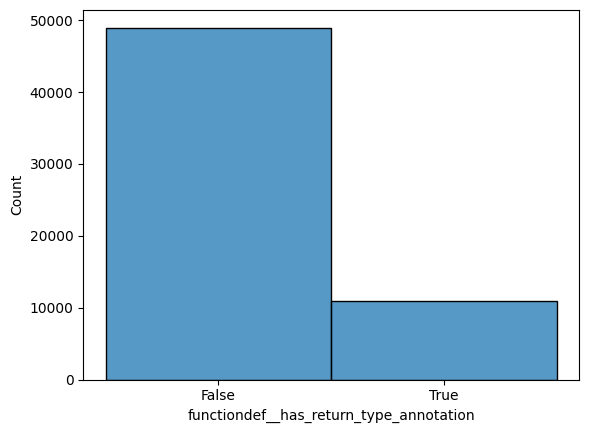

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 10912 valores verdaderos y 48961 valores falsos. Y, la desviación típica es de 0.38605567812919617
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.1822524343193092.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 0.8177475656806908.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 81.77% de los items.
La variable functiondef__has_return_type_annotation toma el valor de 1.0 en un 18.23% de los items.


In [26]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.0,10912.000000,10912.000000,10912.000000,10912.000000,10912.0,10912.0,10912.000000,10912.000000,10912.000000,10912.0
mean,13.042064,0.218933,0.201246,3.229839,0.176248,0.001375,0.225165,1.0,0.330920,1.702804,0.753830,0.001191,0.0,0.0,0.165139,0.000458,0.833211,0.0
std,6.809772,0.413542,0.400950,3.273688,0.257745,0.037052,0.427470,0.0,0.470566,0.493677,0.204281,0.034497,0.0,0.0,0.371323,0.021402,0.372804,0.0
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.500000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.500000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
50%,12.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,0.750000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
75%,17.000000,0.000000,0.000000,4.000000,0.333333,0.000000,0.000000,1.0,1.000000,2.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
max,50.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.0,1.000000,5.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0


### Variable has_doc_string (5/12)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

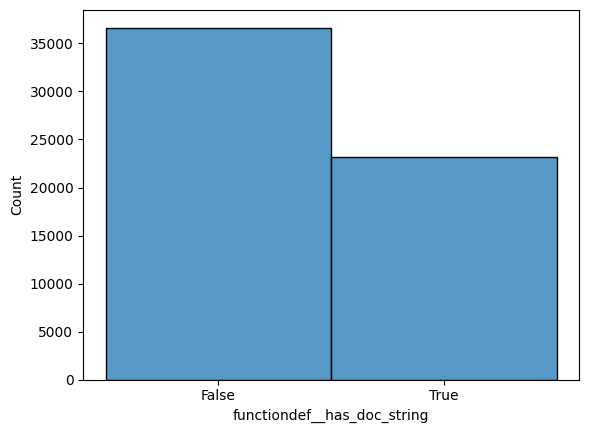

In [27]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [28]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 23221 valores verdaderos y 36652 valores falsos. Y, la desviación típica es de 0.48726126551628113
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.38783758956457837.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.6121624104354216.


In [29]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 0.0 en un 61.22% de los items.
La variable functiondef__has_doc_string toma el valor de 1.0 en un 38.78% de los items.


In [30]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,23221.000000,23221.000000,23221.000000,23221.000000,23221.000000,23221.0,23221.000000,23221.000000,23221.0,23221.000000,23221.000000,23221.000000,23221.000000,23221.0,23221.000000,23221.000000,23221.000000,23221.000000
mean,13.112528,0.050299,0.137591,4.758624,0.373829,0.0,0.108436,0.155506,1.0,1.521812,0.128846,0.138022,0.013522,0.0,0.193919,0.007278,0.647130,0.000129
std,6.146317,0.218567,0.344478,3.852715,0.207393,0.0,0.319544,0.362394,0.0,0.580260,0.310014,0.344930,0.115499,0.0,0.395375,0.085001,0.477873,0.011366
min,1.000000,0.000000,0.000000,1.000000,0.021277,0.0,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,2.000000,0.200000,0.0,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000,4.000000,0.333333,0.0,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,17.000000,0.000000,0.000000,6.000000,0.500000,0.0,0.000000,0.000000,1.0,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,50.000000,1.000000,1.000000,78.000000,1.000000,0.0,2.000000,1.000000,1.0,5.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (6/12)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 50. Con una media de 11.9.

<Axes: ylabel='functiondef__number_of_characters'>

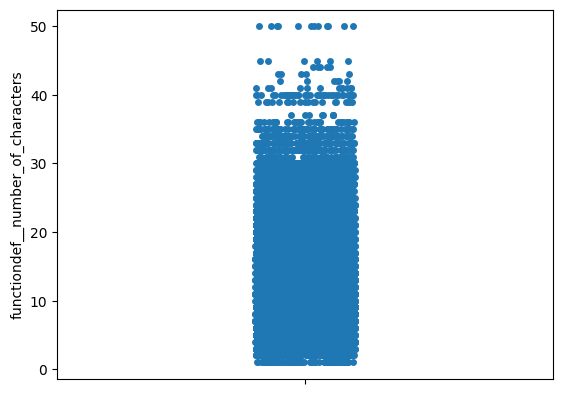

In [31]:
sns.stripplot(X['functiondef__number_of_characters'])

In [32]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6605359064742893
Rango valores atípicos extremos (Tukey): [-13.0,36.0]
Rango valores atípicos leves (Tukey): [-2.5,25.5]
Rango valores atípicos extremos (Fixed BoxPlot): [6.95970993335205,162.45438637825634]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -13.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -2.5 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 1828 instancias tienen un valor para functiondef__number_of_characters superior a 25.5 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 3.053% del total de instancias.
+3.0IQR: 116 instancias tienen un valor para functiondef__number_of_characters superior a 36.0 (Q3-3*IQR) para functiondef__number_of_characters. Rep

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 36.0 (Con un MC de 66 usamos Tuckey Extremo)

In [33]:
X[X['functiondef__number_of_characters'] > 36].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,116.000000,116.0,116.000000,116.000000,116.000000,116.0,116.0,116.000000,116.000000,116.000000,116.000000,116.000000,116.0,116.0,116.0,116.000000,116.000000,116.0
mean,41.413792,0.0,0.094828,4.043103,0.266441,0.0,0.0,0.344828,0.396552,1.482759,0.344828,0.336207,0.0,0.0,0.0,0.077586,0.586207,0.0
std,3.454220,0.0,0.294248,1.935446,0.321500,0.0,0.0,0.477374,0.491304,0.596843,0.477374,0.474460,0.0,0.0,0.0,0.268680,0.494649,0.0
min,37.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,39.750000,0.0,0.000000,3.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
50%,40.000000,0.0,0.000000,3.000000,0.200000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
75%,42.000000,0.0,0.000000,5.000000,0.350000,0.0,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
max,50.000000,0.0,1.000000,8.000000,1.000000,0.0,0.0,1.000000,1.000000,3.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0


### IMPORTANTE
Hay que revisar los 12 con nombres de 50

### Variable body_count (7/12)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 150. Con una media de 3.73.

<Axes: ylabel='functiondef__body_count'>

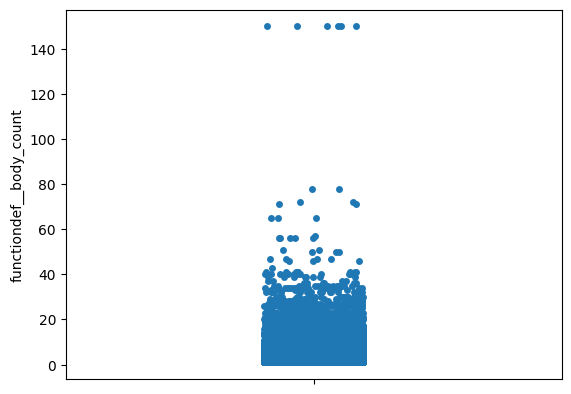

In [34]:
sns.stripplot(X['functiondef__body_count'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente.

In [35]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8726765003015735
Rango valores atípicos extremos (Tukey): [-11.0,17.0]
Rango valores atípicos leves (Tukey): [-5.0,11.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.7170848591129797,201.85461678596863]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -11.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -5.0 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 1987 instancias tienen un valor para functiondef__body_count superior a 11.0 (Q3+1.5*IQR) para functiondef__body_count. Representando un 3.319% del total de instancias.
+3.0IQR: 673 instancias tienen un valor para functiondef__body_count superior a 17.0 (Q3-3*IQR) para functiondef__body_count. Representando un 1.124% del total de instancias.
L: 0 instancias tienen un valor 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 17.0 (Con un MC de 87 usamos U)

In [36]:
X[X['functiondef__body_count'] > 17].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.0,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.0,673.000000,673.000000,673.000000,673.0
mean,10.811293,0.158990,0.063893,26.986628,0.254103,0.0,0.053492,0.118871,0.462110,1.597325,0.092403,0.156018,0.007429,0.0,0.249629,0.010401,0.576523,0.0
std,4.920655,0.365938,0.244744,14.742374,0.269618,0.0,0.225179,0.323877,0.498933,0.534349,0.259678,0.363142,0.085937,0.0,0.433120,0.101530,0.494477,0.0
min,3.000000,0.000000,0.000000,18.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,8.000000,0.000000,0.000000,20.000000,0.043478,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,10.000000,0.000000,0.000000,23.000000,0.157895,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
75%,14.000000,0.000000,0.000000,29.000000,0.444444,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
max,27.000000,1.000000,1.000000,150.000000,1.000000,0.0,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
Hay que revisar los 6 que tienen longitud 150

### Variable number_of_decorators (8/12)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 2. Con una media de 0.09.

<Axes: ylabel='functiondef__number_of_decorators'>

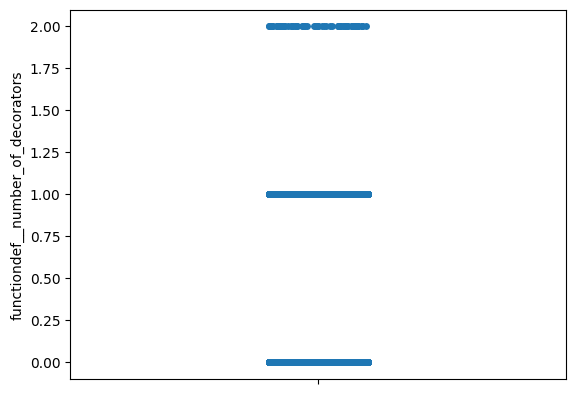

In [37]:
sns.stripplot(X['functiondef__number_of_decorators'])

In [38]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8162398610161845
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 5623 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 9.392% del total de instancias.
+3.0IQR: 5623 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 9.392% del total de ins

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [39]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.000000,5623.0,5623.000000,5623.000000
mean,11.856127,0.022408,0.171972,2.648764,0.203108,0.008892,1.011204,0.428953,0.436600,1.947003,0.264705,0.030411,0.037347,0.000889,0.335230,0.0,0.590788,0.005335
std,5.941770,0.148019,0.377390,2.592141,0.261797,0.093886,0.105264,0.494971,0.496008,0.315103,0.325875,0.171730,0.189627,0.029809,0.472113,0.0,0.491732,0.072854
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,11.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,15.000000,0.000000,0.000000,3.000000,0.333333,0.000000,1.000000,1.000000,1.000000,2.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000
max,36.000000,1.000000,1.000000,27.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### IMPORTANTE
El 90% de las funciones no tienen decoradores. Y hay 63 funciones con 2.

### Variable height (9/12)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 7. Con una media de 1.73.

<Axes: ylabel='functiondef__height'>

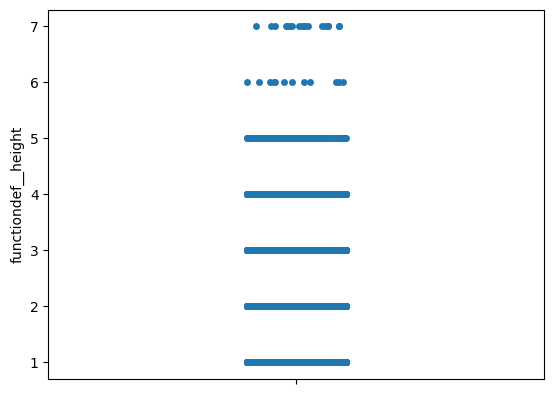

In [40]:
sns.stripplot(X['functiondef__height'])

In [41]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3088559501205598
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.49111372582826096,7.159754024003165]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a -2.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a -0.5 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 1037 instancias tienen un valor para functiondef__height superior a 3.5 (Q3+1.5*IQR) para functiondef__height. Representando un 1.732% del total de instancias.
+3.0IQR: 30 instancias tienen un valor para functiondef__height superior a 5.0 (Q3-3*IQR) para functiondef__height. Representando un 0.05011% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 5.0 (Con un MC de 30 usamos Tuckey Extremo)

In [42]:
X[X['functiondef__height'] > 5].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,30.000000,30.0,30.000000,30.000000,30.000000,30.0,30.0,30.0,30.0,30.000000,30.0,30.0,30.0,30.0,30.000000,30.0,30.000000,30.0
mean,13.600000,0.0,0.200000,3.600000,0.140000,0.0,0.0,0.0,0.0,6.600000,0.0,0.0,0.0,0.0,0.200000,0.0,0.800000,0.0
std,5.130033,0.0,0.406838,2.094327,0.199309,0.0,0.0,0.0,0.0,0.498273,0.0,0.0,0.0,0.0,0.406838,0.0,0.406838,0.0
min,7.000000,0.0,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,6.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,11.000000,0.0,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,6.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
50%,11.000000,0.0,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
75%,19.000000,0.0,0.000000,5.000000,0.200000,0.0,0.0,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
max,20.000000,0.0,1.000000,7.000000,0.500000,0.0,0.0,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0


### IMPORTANTE
Hay 18 funciones con altura mayor que 6, hay que analizarlas 

### Variable expressions_pct (10/12)
Esta variable representa la proporción de las sentencias en el root de la funcion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.21.

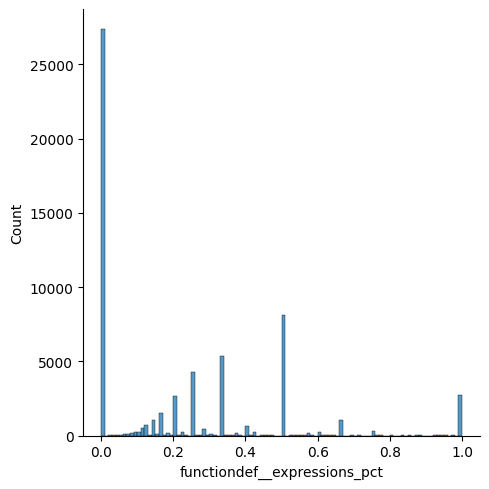

In [43]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [44]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5155932903289795
Rango valores atípicos extremos (Tukey): [-1.0000000298023224,1.3333333730697632]
Rango valores atípicos leves (Tukey): [-0.5000000149011612,0.833333358168602]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.08227206425360199,4.265639297301073]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.0000000298023224 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.5000000149011612 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 2817 instancias tienen un valor para functiondef__expressions_pct superior a 0.833333358168602 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 4.705% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct superi

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.83 (Con un MC de 0.51 usamos Tuckey)

In [45]:
X[X['functiondef__expressions_pct'] > 0.84].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.00000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.0,2817.000000,2817.000000,2817.000000,2817.0
mean,11.290380,0.125311,0.063188,2.319489,0.996284,0.00213,0.100816,0.173234,0.401846,1.939652,0.114969,0.190273,0.015264,0.0,0.273340,0.028754,0.492368,0.0
std,5.775711,0.331130,0.243344,3.530632,0.020016,0.04611,0.350207,0.378517,0.490358,0.760285,0.262114,0.392586,0.122625,0.0,0.445753,0.167144,0.500031,0.0
min,3.000000,0.000000,0.000000,1.000000,0.846154,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,8.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,11.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,14.000000,0.000000,0.000000,2.000000,1.000000,0.00000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.0
max,50.000000,1.000000,1.000000,47.000000,1.000000,1.00000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
El 46% tienen un 0% y el 5% un 100% de expresiones.

### Variable type_annotations_pct (11/12)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 1.0. Su media es 0.13.

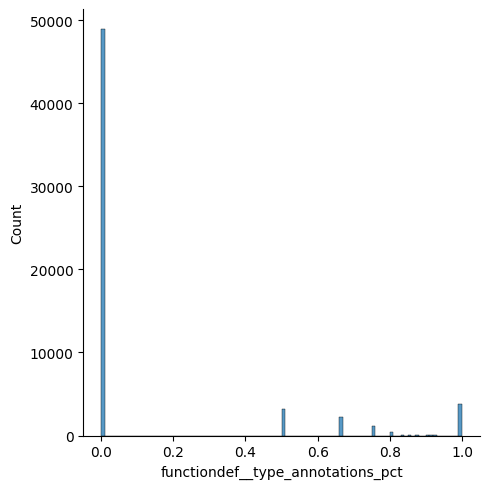

In [46]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [47]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7038655746187968
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a 0.0 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a 0.0 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 10984 instancias tienen un valor para functiondef__type_annotations_pct superior a 0.0 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 18.35% del total de instancias.
+3.0IQR: 10984 instancias tienen un valor para functiondef__type_annotations_pct superior a 0.0 (Q3-3*IQR) para functiondef__type_annotations_pct. Representando un 18.35% del total de i

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0 (Todos los umbrales son 0)

In [48]:
X[X['functiondef__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.0,10984.0,10984.000000,10984.000000,10984.000000,10984.0
mean,13.016843,0.222141,0.199927,3.245357,0.176017,0.001366,0.223689,0.993445,0.330208,1.702840,0.753652,0.002003,0.0,0.0,0.164148,0.000546,0.833303,0.0
std,6.797656,0.415705,0.399964,3.279754,0.257283,0.036931,0.426453,0.080701,0.470309,0.493431,0.204286,0.044711,0.0,0.0,0.370427,0.023367,0.372722,0.0
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.200000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
50%,12.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.750000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
75%,17.000000,0.000000,0.000000,4.000000,0.333333,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
max,50.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
El 81% tienen un 0% y el 6% un 100% de anotaciones de tipo.

### Variable name_convention (12/22)
Esta variable es de tipo categórica y representa la name_convention del nombre de la funcion.

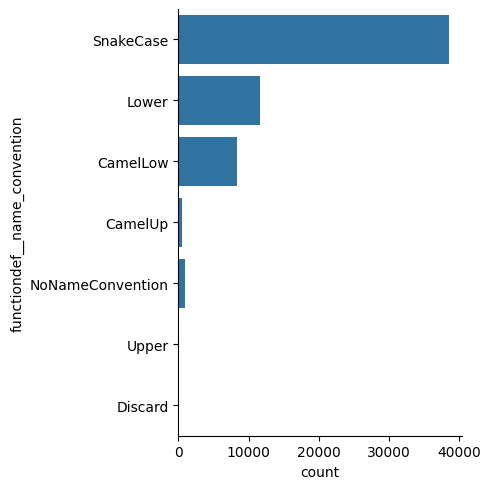

In [49]:
sns.catplot(full_table['functiondef__name_convention'], kind="count")

In [50]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable functiondef__name_convention toma el valor de SnakeCase en un 64.23% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 19.35% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 13.93% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 1.451% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 0.922% de los items.
La variable functiondef__name_convention toma el valor de Upper en un 0.1052% de los items.
La variable functiondef__name_convention toma el valor de Discard en un 0.008351% de los items. [OUTLIER]


### IMPORTANTE
Dicard es outlier

## Multivariate

TODO: isolation forest algorithm

In [51]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__expertise_level
4063,NoNameConvention,8,True,False,1,0.000000,False,0,False,False,4,0.000000,BEGINNER
4068,NoNameConvention,14,True,False,3,0.666667,False,0,False,False,4,0.000000,BEGINNER
4069,NoNameConvention,14,True,False,1,0.000000,False,0,False,False,4,0.000000,BEGINNER
4070,NoNameConvention,8,True,False,1,0.000000,False,0,False,False,4,0.000000,BEGINNER
4079,NoNameConvention,10,True,False,2,0.000000,False,0,False,False,4,0.000000,BEGINNER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56577,NoNameConvention,28,True,False,1,1.000000,False,0,False,False,1,0.000000,BEGINNER
56915,Lower,11,False,False,1,1.000000,False,1,True,True,2,0.666667,BEGINNER
57256,NoNameConvention,28,True,False,1,1.000000,False,0,False,False,1,0.000000,BEGINNER
58838,Lower,11,False,False,1,1.000000,False,1,True,True,2,0.666667,BEGINNER


### IMPORTANTE
Hay que analizar los 68 los outliers de la tabla.